In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import bootcampviztools as b

# Carga de datos y preparacion de los dataframes --> overtakes.csv & races.csv

## df_overtakes --> overtakes.csv

In [2]:
df_overtakes = pd.read_csv("./data/overtakes.csv")
filtro_2022_Sprint = df_overtakes[df_overtakes["Race"] == "Emilia-Romagna S"].index
df_overtakes.drop(filtro_2022_Sprint, inplace=True)

for race in df_overtakes["Race"]:
    if "Sprint" in race:
        filtro = df_overtakes[df_overtakes.Race == race].index
        df_overtakes.drop(filtro, inplace=True)
     
df_overtakes.drop(df_overtakes[df_overtakes.Season == 2024].index, inplace = True)
filtro_less_Season = df_overtakes[df_overtakes.Race == "Season"].index
df_overtakes = df_overtakes.drop(filtro_less_Season)
df_overtakes.head(5)

,Season,Race,Overtakes,TV,Percentage
0,1984,Brazil,61,14,22.95
1,1984,South Africa,83,15,18.07
2,1984,Belgium,50,14,28.00
3,1984,San Marino,53,5,9.43
4,1984,France,54,15,27.78


## df_races --> races.csv

In [3]:
df_races = pd.read_csv("./data/races.csv")
df_races = df_races.drop(columns = ["time","fp1_date", "fp1_time", "fp2_date", "fp2_time", "fp3_date", "fp3_time", "quali_date", "quali_time", "sprint_date", "sprint_time"])

In [4]:
filtro_1984 = df_races["year"] >= 1984
df_races = df_races.loc[filtro_1984]
filtro_less_2024 = df_races["year"] < 2024
df_races = df_races.loc[filtro_less_2024]

In [5]:
df_races = df_races.sort_values(by=["year","round"])
df_races["indice"] = list(range(0,713,1))

In [6]:
df_races.set_index("indice")

,raceId,year,round,circuitId,name,date,url
indice,,,,,,,
0,436,1984,1,36,Brazilian Grand Prix,1984-03-25,http://en.wikipedia.org/wiki/1984_Brazilian_Gr...
1,437,1984,2,30,South African Grand Prix,1984-04-07,http://en.wikipedia.org/wiki/1984_South_Africa...
2,438,1984,3,40,Belgian Grand Prix,1984-04-29,http://en.wikipedia.org/wiki/1984_Belgian_Gran...
3,439,1984,4,21,San Marino Grand Prix,1984-05-06,http://en.wikipedia.org/wiki/1984_San_Marino_G...
4,440,1984,5,41,French Grand Prix,1984-05-20,http://en.wikipedia.org/wiki/1984_French_Grand...
...,...,...,...,...,...,...,...
708,1116,2023,18,69,United States Grand Prix,2023-10-22,https://en.wikipedia.org/wiki/2023_United_Stat...
709,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,https://en.wikipedia.org/wiki/2023_Mexico_City...
710,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...


In [7]:
df_overtakes["indice"] = list(range(0,713,1))

In [8]:
df_overtakes.set_index("indice")

,Season,Race,Overtakes,TV,Percentage
indice,,,,,
0,1984,Brazil,61,14,22.95
1,1984,South Africa,83,15,18.07
2,1984,Belgium,50,14,28.00
3,1984,San Marino,53,5,9.43
4,1984,France,54,15,27.78
...,...,...,...,...,...
708,2023,USA,47,28,59.57
709,2023,Mexico,48,29,60.42
710,2023,Brazil,25,18,72.00


# Unión de data frame df_overtakes & df_races

In [9]:
df_race_overtake = pd.merge(df_overtakes, df_races, on ='indice', how ='left')

In [10]:
df_race_overtake.to_csv("./data/race_overtake.csv", index=False) 

In [11]:
df_race_overtake.head(3)

,Season,Race,Overtakes,TV,Percentage,indice,raceId,year,round,circuitId,name,date,url
0,1984,Brazil,61,14,22.95,0,436,1984,1,36,Brazilian Grand Prix,1984-03-25,http://en.wikipedia.org/wiki/1984_Brazilian_Gr...
1,1984,South Africa,83,15,18.07,1,437,1984,2,30,South African Grand Prix,1984-04-07,http://en.wikipedia.org/wiki/1984_South_Africa...
2,1984,Belgium,50,14,28.00,2,438,1984,3,40,Belgian Grand Prix,1984-04-29,http://en.wikipedia.org/wiki/1984_Belgian_Gran...


# Carga de datos y preparacion del dataframe --> weather_description_bs_completed.csv

## df_wet_races --> weather_description_bs_completed.csv

In [12]:
df_wet_races = pd.read_csv("./data/weather_description_bs_completed.csv")
df_wet_races

,Unnamed: 0,year,name,race_id,weather_description,is_it_wet
0,0,1950,Italian Grand Prix,839,"Warm, hot and sunny",Not Wet
1,1,1950,French Grand Prix,838,Hot and sunny,Not Wet
2,2,1950,Belgian Grand Prix,837,"Warm, dry and sunny",Not Wet
3,3,1950,Swiss Grand Prix,836,"Warm, dry and sunny",Not Wet
4,4,1950,Indianapolis 500,835,No weather description,Not Wet
...,...,...,...,...,...,...
1120,1120,2024,Australian Grand Prix,1123,Sunny,Not Wet
1121,1121,2024,Saudi Arabian Grand Prix,1122,Clear,Not Wet
1122,1122,2024,Bahrain Grand Prix,1121,Clear,Not Wet
1123,1123,2024,Austrian Grand Prix,1131,Partly cloudy,Not Wet


In [13]:
df_wet_races = pd.read_csv("./data/weather_description_bs_completed.csv")
filtro_1984 = df_wet_races["year"] >= 1984
df_wet_races = df_wet_races.loc[filtro_1984]
filtro_less_2024 = df_wet_races["year"] < 2024
df_wet_races = df_wet_races.loc[filtro_less_2024]
df_wet_races.drop(columns="Unnamed: 0", inplace=True)
df_wet_races.rename(columns={"race_id":"raceId", "is_it_wet":"weather"}, inplace=True)
df_wet_races["weather"] = df_wet_races["weather"].replace("Not Wet", "Dry")
df_wet_races

,year,name,raceId,weather_description,weather
388,1984,Belgian Grand Prix,438,No weather description,Dry
389,1984,South African Grand Prix,437,Dry,Dry
390,1984,French Grand Prix,440,Dry,Dry
391,1984,Monaco Grand Prix,441,Heavy rain and spray,Wet
392,1984,Canadian Grand Prix,442,Dry with temperatures approaching 26 °C (79 °F...,Dry
...,...,...,...,...,...
1096,2023,Miami Grand Prix,1102,Partly cloudy,Dry
1097,2023,Azerbaijan Grand Prix,1101,Partly cloudy,Dry
1098,2023,Australian Grand Prix,1100,Sunny,Dry
1099,2023,Saudi Arabian Grand Prix,1099,Clear,Dry


# Unión de data frame df_overtake & df_wet_races

In [14]:
df_weather_overtake = pd.merge(df_race_overtake,df_wet_races, on ='raceId', how ='outer')

In [15]:
df_weather_overtake.head(10)

,Season,Race,Overtakes,TV,Percentage,indice,raceId,year_x,round,circuitId,name_x,date,url,year_y,name_y,weather_description,weather
0,2009,Australia,32,18,56.25,415,1,2009,1,1,Australian Grand Prix,2009-03-29,http://en.wikipedia.org/wiki/2009_Australian_G...,2009,Australian Grand Prix,Sunny with temperatures reaching up to 27 °C (...,Dry
1,2009,Malaysia,38,29,76.32,416,2,2009,2,2,Malaysian Grand Prix,2009-04-05,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,2009,Malaysian Grand Prix,"Dry start, with heavy rain and thunderstorm/mo...",Wet
2,2009,China,65,22,33.85,417,3,2009,3,17,Chinese Grand Prix,2009-04-19,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,2009,Chinese Grand Prix,Rain,Wet
3,2009,Bahrain,31,21,67.74,418,4,2009,4,3,Bahrain Grand Prix,2009-04-26,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,2009,Bahrain Grand Prix,Sunny,Dry
4,2009,Spain,3,3,100.00,419,5,2009,5,4,Spanish Grand Prix,2009-05-10,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,2009,Spanish Grand Prix,"Warm, Sunny",Dry
5,2009,Monaco,8,6,75.00,420,6,2009,6,6,Monaco Grand Prix,2009-05-24,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,2009,Monaco Grand Prix,Sunny,Dry
6,2009,Turkey,13,9,69.23,421,7,2009,7,5,Turkish Grand Prix,2009-06-07,http://en.wikipedia.org/wiki/2009_Turkish_Gran...,2009,Turkish Grand Prix,Sunny,Dry
7,2009,Great Britain,11,9,81.82,422,8,2009,8,9,British Grand Prix,2009-06-21,http://en.wikipedia.org/wiki/2009_British_Gran...,2009,British Grand Prix,"Dry, overcast",Dry
8,2009,Germany,18,9,50.00,423,9,2009,9,20,German Grand Prix,2009-07-12,http://en.wikipedia.org/wiki/2009_German_Grand...,2009,German Grand Prix,Sunny and overcast,Dry
9,2009,Hungary,7,7,100.00,424,10,2009,10,11,Hungarian Grand Prix,2009-07-26,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...,2009,Hungarian Grand Prix,Sunny25 °C (77 °F)[3],Dry


In [16]:
df_weather_overtake.drop(columns=["indice","year_x","round","date","year_y","name_y"],inplace=True)

# Guardado de df_weather_overtake en weather_overtake_bs_completed.csv

In [17]:
df_weather_overtake.to_csv("./data/weather_overtake_bs_completed.csv", index=False) 

In [18]:
df_weather_overtake

,Season,Race,Overtakes,TV,Percentage,raceId,circuitId,name_x,url,weather_description,weather
0,2009,Australia,32,18,56.25,1,1,Australian Grand Prix,http://en.wikipedia.org/wiki/2009_Australian_G...,Sunny with temperatures reaching up to 27 °C (...,Dry
1,2009,Malaysia,38,29,76.32,2,2,Malaysian Grand Prix,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,"Dry start, with heavy rain and thunderstorm/mo...",Wet
2,2009,China,65,22,33.85,3,17,Chinese Grand Prix,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,Rain,Wet
3,2009,Bahrain,31,21,67.74,4,3,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,Sunny,Dry
4,2009,Spain,3,3,100.00,5,4,Spanish Grand Prix,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,"Warm, Sunny",Dry
...,...,...,...,...,...,...,...,...,...,...,...
708,2023,USA,47,28,59.57,1116,69,United States Grand Prix,https://en.wikipedia.org/wiki/2023_United_Stat...,Sunny,Dry
709,2023,Mexico,48,29,60.42,1117,32,Mexico City Grand Prix,https://en.wikipedia.org/wiki/2023_Mexico_City...,Sunny,Dry
710,2023,Brazil,25,18,72.00,1118,18,São Paulo Grand Prix,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,Partly cloudy,Dry
711,2023,Las Vegas,99,54,54.55,1119,80,Las Vegas Grand Prix,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,Clear,Dry


# Gráficas

## 1. Número carreras absoluto y % en mojado (WET)

### 1.1 Número absoluto de carreras en condiciones WET por temporada

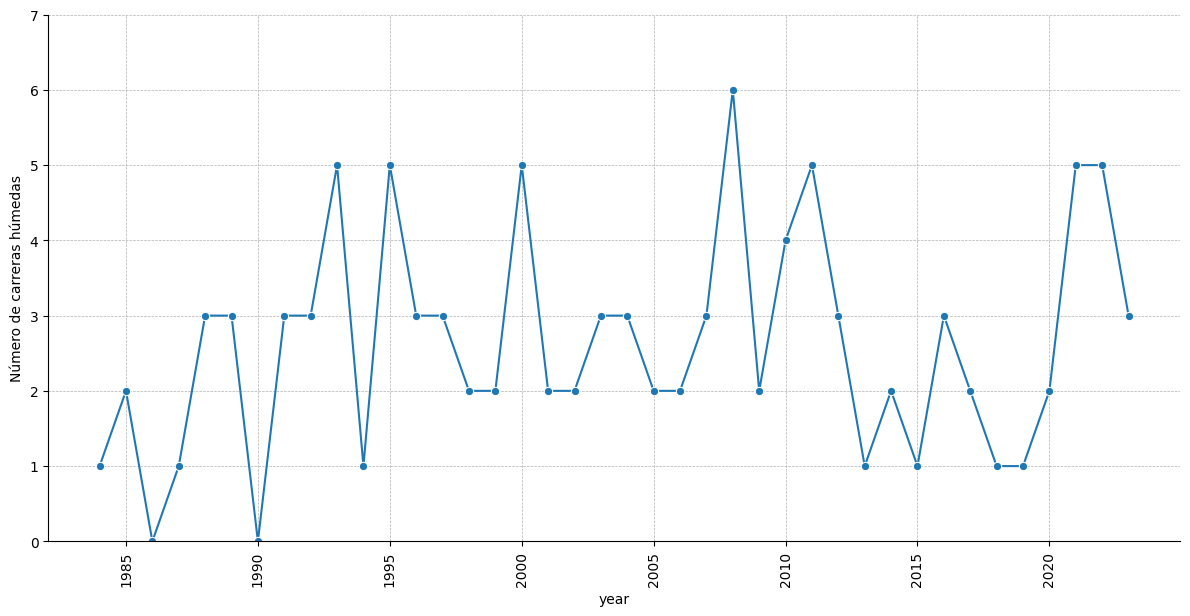

In [19]:
filtro_wet = df_wet_races["weather"] == "Wet"
only_wet_races = df_wet_races.loc[filtro_wet]

count_by_year = only_wet_races.groupby("year")["weather"].count().reset_index(name='count')

all_years = pd.DataFrame({'year': range(1984, 2024)})  


merged_data = pd.merge(all_years, count_by_year, on='year', how='left').fillna(0)

merged_data['count'] = merged_data['count'].astype(int)


axs = sns.relplot(data=merged_data, kind="line", x="year", y="count", marker='o', height=6, aspect=2)

ax = axs.ax


ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Número de carreras húmedas")
ax.set_ylim(0, merged_data['count'].max())  
plt.yticks(range(0, merged_data['count'].max() + 2, 1))  #


ax.grid(axis='x', linestyle='dashed', linewidth=0.5)
ax.grid(axis='y', linestyle='dashed', linewidth=0.5)

plt.savefig("./img/3_Weather/Carreras_wet_abs_count.png")   

### 1.2 % carreras en condiciones WET por temporada

In [20]:
filtro_anio = (df_races["year"] >= 1984) & (df_races["year"] < 2024)
df_races[filtro_anio]
df_races_reduced = df_races[filtro_anio].groupby("year", as_index=False).size()
df_races_reduced.head(3)

,year,size
0,1984,16
1,1985,16
2,1986,16


In [21]:
wet_races_percentage = pd.DataFrame({'year': range(1984, 2024), 'percentage': round((merged_data["count"]/ df_races_reduced["size"] * 100),1)})
wet_races_percentage.reset_index(drop=True).head(3)

,year,percentage
0,1984,6.2
1,1985,12.5
2,1986,0.0


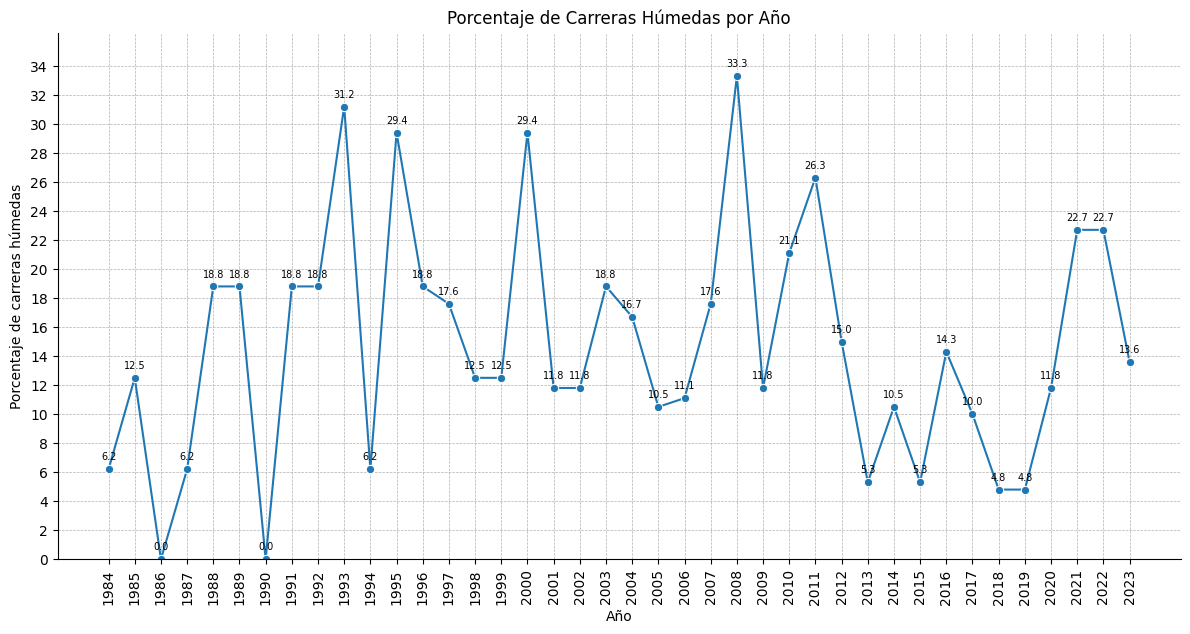

In [22]:
axs = sns.relplot(data=wet_races_percentage, kind="line", x="year", y="percentage", marker='o', height=6, aspect=2)

ax = axs.ax

ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Porcentaje de carreras húmedas")
ax.set_ylim(0, wet_races_percentage['percentage'].max() + 3) 
plt.xticks(ticks=wet_races_percentage['year'], labels=wet_races_percentage['year'], rotation=90)
plt.yticks(range(0, int(wet_races_percentage['percentage'].max()) + 2, 2)) 

ax.grid(axis='x', linestyle='dashed', linewidth=0.5)
ax.grid(axis='y', linestyle='dashed', linewidth=0.5)

for i in range(len(wet_races_percentage)):
    ax.text(wet_races_percentage['year'].iloc[i], wet_races_percentage['percentage'].iloc[i] + 0.5,
            f"{wet_races_percentage['percentage'].iloc[i]:.1f}", 
            ha='center', va='bottom', fontsize = 7)

plt.title("Porcentaje de Carreras Húmedas por Año")
plt.xlabel("Año")
plt.savefig("./img/3_Weather/Carreras_wet_rel_count.png",bbox_inches='tight')   
plt.show()

### 1.3 IMPORTANTE: Gráfico de dispersión con regresión cúbica e intervalo de confianza

Regresión Cúbica (order=3)
Descripción: Ajusta una curva cúbica a los datos.
Uso: Es útil para relaciones más complejas donde puede haber múltiples picos y valles. Esto permite capturar patrones más intrincados en los datos.
Visualización: La gráfica mostrará una curva con al menos dos cambios de dirección.

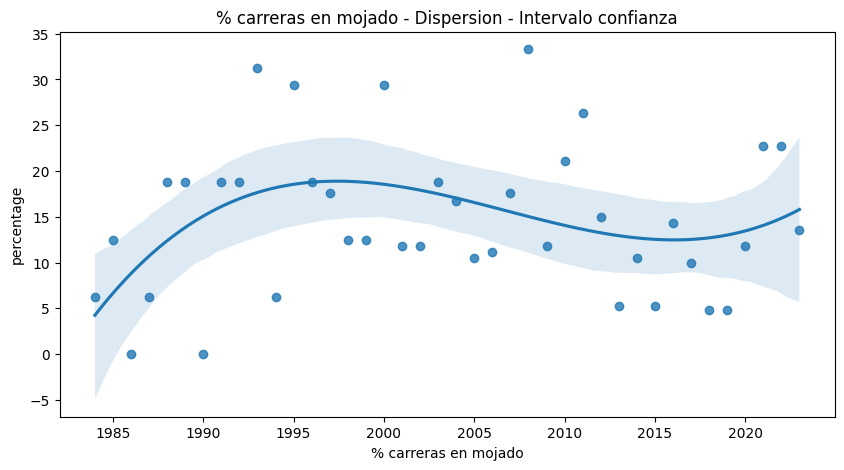

In [23]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.regplot(wet_races_percentage,x="year",y="percentage", order=3)
plt.title("% carreras en mojado - Dispersion - Intervalo confianza")
plt.xlabel("% carreras en mojado")
plt.savefig("./img/3_Weather/Dispersion_%_carreras_wet.png")  


## 2. Comparacion tendencia adelantamientos WET y DRY

### 2.1 Tendencia adelantamientos comparativa WET y DRY

In [24]:
df_weather_overtake

,Season,Race,Overtakes,TV,Percentage,raceId,circuitId,name_x,url,weather_description,weather
0,2009,Australia,32,18,56.25,1,1,Australian Grand Prix,http://en.wikipedia.org/wiki/2009_Australian_G...,Sunny with temperatures reaching up to 27 °C (...,Dry
1,2009,Malaysia,38,29,76.32,2,2,Malaysian Grand Prix,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,"Dry start, with heavy rain and thunderstorm/mo...",Wet
2,2009,China,65,22,33.85,3,17,Chinese Grand Prix,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,Rain,Wet
3,2009,Bahrain,31,21,67.74,4,3,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,Sunny,Dry
4,2009,Spain,3,3,100.00,5,4,Spanish Grand Prix,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,"Warm, Sunny",Dry
...,...,...,...,...,...,...,...,...,...,...,...
708,2023,USA,47,28,59.57,1116,69,United States Grand Prix,https://en.wikipedia.org/wiki/2023_United_Stat...,Sunny,Dry
709,2023,Mexico,48,29,60.42,1117,32,Mexico City Grand Prix,https://en.wikipedia.org/wiki/2023_Mexico_City...,Sunny,Dry
710,2023,Brazil,25,18,72.00,1118,18,São Paulo Grand Prix,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,Partly cloudy,Dry
711,2023,Las Vegas,99,54,54.55,1119,80,Las Vegas Grand Prix,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,Clear,Dry


<Figure size 1800x600 with 0 Axes>

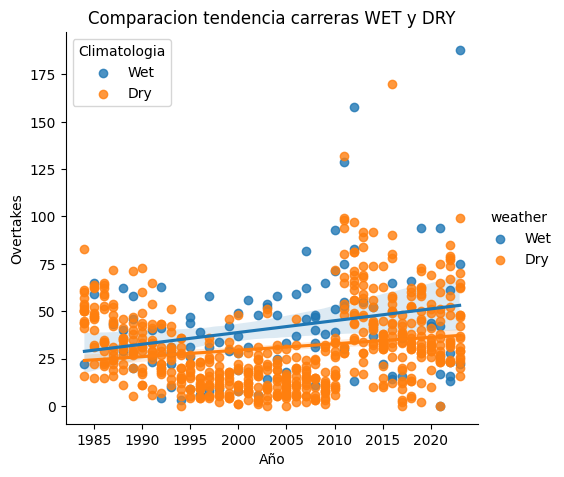

In [25]:
plt.figure(figsize=(18, 6))
sns.lmplot(data=df_weather_overtake, x="Season", y="Overtakes", hue="weather", hue_order=["Wet","Dry"])

plt.subplots_adjust(top=0.9)
plt.title("Comparacion tendencia carreras WET y DRY")
plt.xlabel("Año")
plt.legend(title="Climatologia")
plt.savefig("./img/3_Weather/Comparacion_wet_dry.png") 

# 3. Comparación adelantamientos entre WET y DRY

### 3.1 Gráfico de barras - Adelantamientos por temporada - WET vs DRY

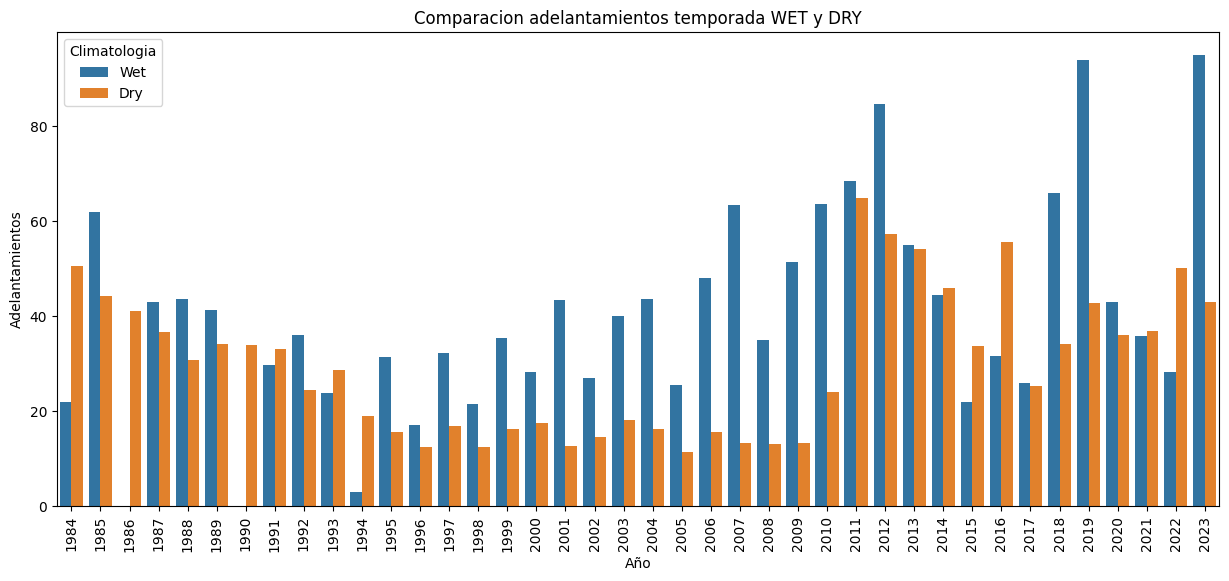

In [26]:
plt.figure(figsize=(15, 6))  # Ajusta el tamaño según sea necesario (ancho, alto)

axs = sns.barplot(data=df_weather_overtake, x="Season", y="Overtakes", hue="weather", errorbar=None, hue_order=["Wet","Dry"])

axs.tick_params(axis='x', rotation=90)

plt.subplots_adjust(top=0.9)
plt.title("Comparacion adelantamientos temporada WET y DRY")
plt.xlabel("Año")
plt.ylabel("Adelantamientos")
plt.legend(title="Climatologia")
plt.savefig("./img/3_Weather/Comparacion_adelantamientos_wet_dry.png") 


### 3.2 Gráfico de lineas con intervalo de confianza - Adelantamientos por temporada - WET vs DRY

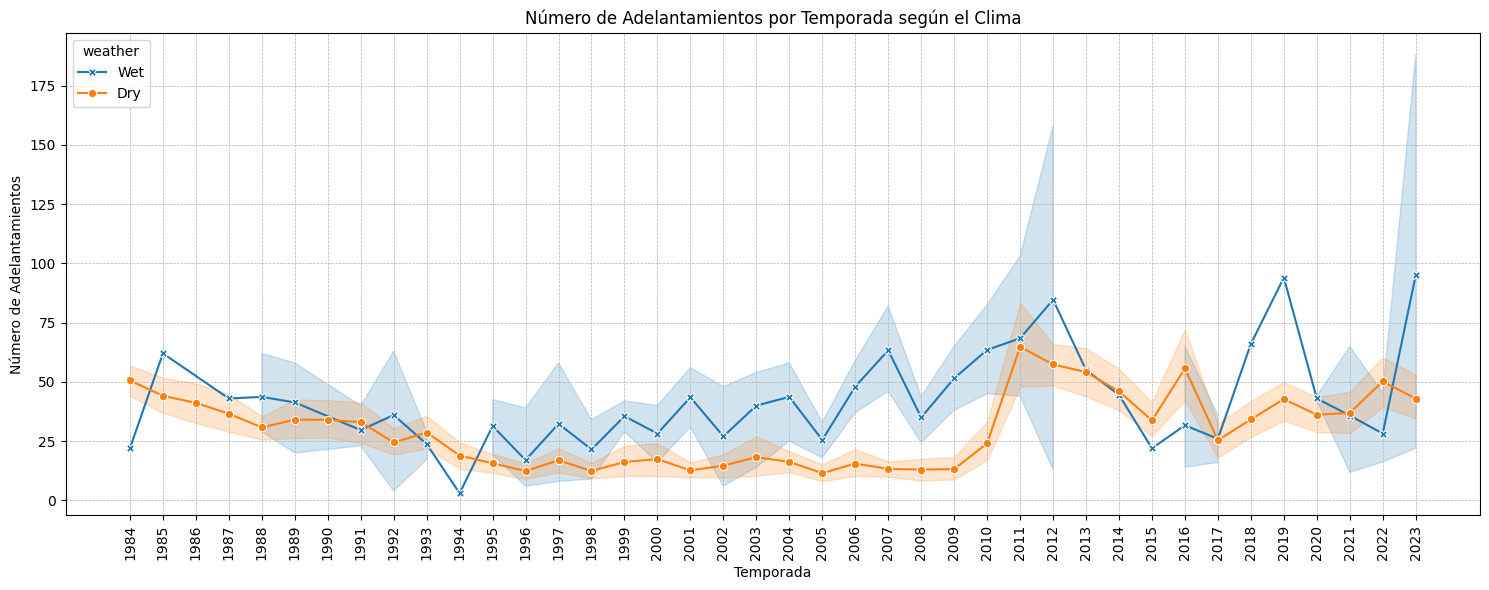

In [27]:
plt.figure(figsize=(15, 6))  
axs = sns.lineplot(data=df_weather_overtake, x="Season", y="Overtakes", hue="weather",style="weather", markers=True, dashes=False, hue_order=["Wet", "Dry"])
plt.xticks(ticks=df_weather_overtake['Season'].unique(), rotation=90)

plt.ylabel("Número de Adelantamientos")
plt.title("Número de Adelantamientos por Temporada según el Clima")
plt.xlabel("Temporada")
plt.grid(axis="x", linestyle = "dashed", linewidth = 0.5)
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.5)

plt.savefig("./img/3_Weather/Número_Adelantamientos_Temporada_según_Clima.png") 
plt.tight_layout()  
plt.show()

### 3.3 Gráfico de barras Media delantamientos - WET vs DRY

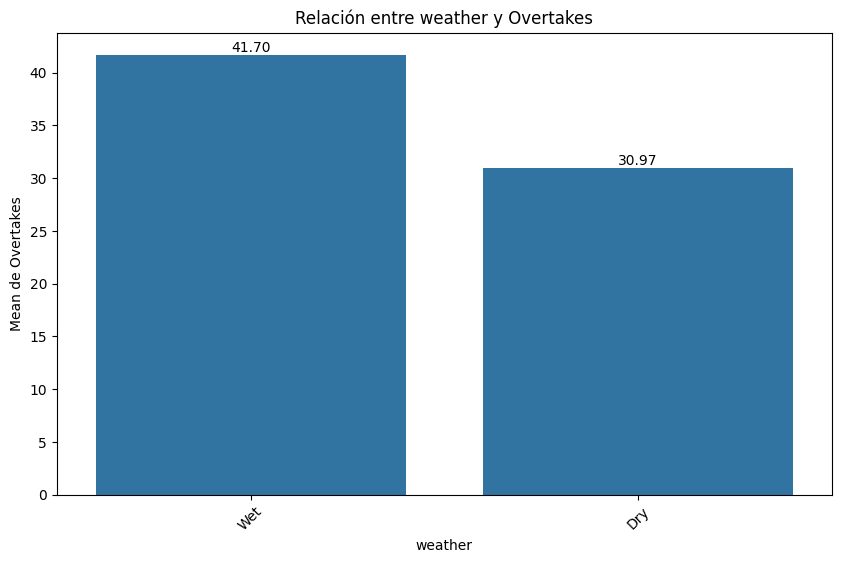

In [28]:
b.plot_categorical_numerical_relationship(df_weather_overtake, "weather","Overtakes", show_values=True)

# 4. Análisis trivariante y Test de Pearson

## 4.1 WET y % Adandono - Análisis gráfico y estadístico

In [29]:
df_percent_DNF = pd.read_csv("./data/df_percent_DNF.csv") 

In [30]:
df_relation_percent_DNF_wet_races = pd.merge(wet_races_percentage, df_percent_DNF, on="year", how="left")

In [31]:
df_relation_percent_DNF_wet_races.head(3)

,year,percentage,ratio_DNF
0,1984,6.2,155.95
1,1985,12.5,120.65
2,1986,0.0,132.77


### 4.1.1 Análisis por temporadas

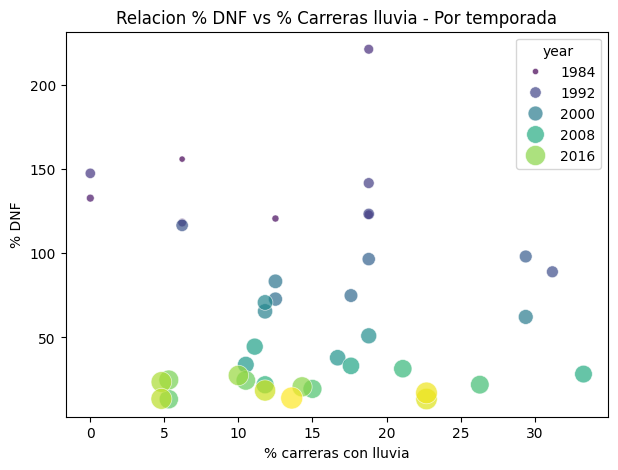

In [32]:
# Se oberva como la evolucion temporal es determinante para la reducon de los DNF.
# No se oberva una relacion clara entre que llueva menos y hayan menos DNF, quiza ligeramente, pero no para sacar conclusiones.

plt.figure(figsize=(7, 5))  
sns.scatterplot(df_relation_percent_DNF_wet_races,x="percentage",y="ratio_DNF", size ="year", sizes = (20, 250), alpha = 0.7, hue="year", palette="viridis")
plt.xlabel("% carreras con lluvia")
plt.ylabel ("% DNF")
plt.title("Relacion % DNF vs % Carreras lluvia - Por temporada")
plt.savefig("./img/3_Weather/Tri_Relacion_DNF_Lluvia.png")

In [33]:
from scipy.stats import pearsonr

In [34]:
# Como p es mayor que 0,05 se acepta la hipotesis nula --> No hay relacion entre las variables
# Ademas el Coef. de correlacion es practicamente 0 --> -0.084

corr, p_value = pearsonr(df_relation_percent_DNF_wet_races['ratio_DNF'], df_relation_percent_DNF_wet_races['percentage'])
print(f"Coeficiente de correlación: {corr}, Valor p: {p_value}")

Coeficiente de correlación: -0.08411798238033805, Valor p: 0.605815978958643


### 4.1.2 Análisis por % carreras con lluvia

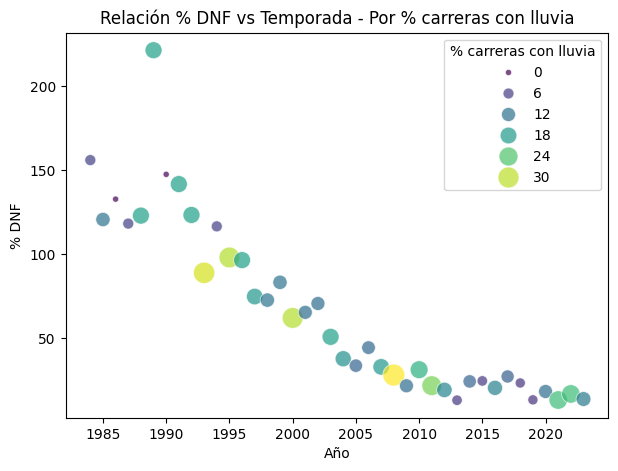

In [35]:
# Al igual que en el analisis anterior, no se percibe ninguna tendencia mas haya de que los años han mejorado sustancialmente los DNF.
# La presencia de agua no es determinandte para los DNF, pues de lo contrario los puntos mas grandes deberian de estar siempre muy por encima del resto.

plt.figure(figsize=(7, 5))  
sns.scatterplot(df_relation_percent_DNF_wet_races,x="year",y="ratio_DNF", size ="percentage", sizes = (20, 250), alpha = 0.7, hue="percentage", palette="viridis")
plt.xlabel("Año")
plt.ylabel ("% DNF")
plt.title("Relación % DNF vs Temporada - Por % carreras con lluvia")
plt.legend(title="% carreras con lluvia")
plt.savefig("./img/3_Weather/Tri_Relacion_DNF_Temporada.png")

In [36]:
# Aqui si que se ve que se rechaza la hipoesis nula, es decir, SI que hay relacion entre las variables.
# El eje temporal define claramente la reduccion en DNF.

corr, p_value = pearsonr(df_relation_percent_DNF_wet_races['ratio_DNF'], df_relation_percent_DNF_wet_races['year'])
print(f"Coeficiente de correlación: {corr}, Valor p: {p_value}")

Coeficiente de correlación: -0.901165743941513, Valor p: 2.272636985071103e-15


### 4.1.3 Análisis por % DNF

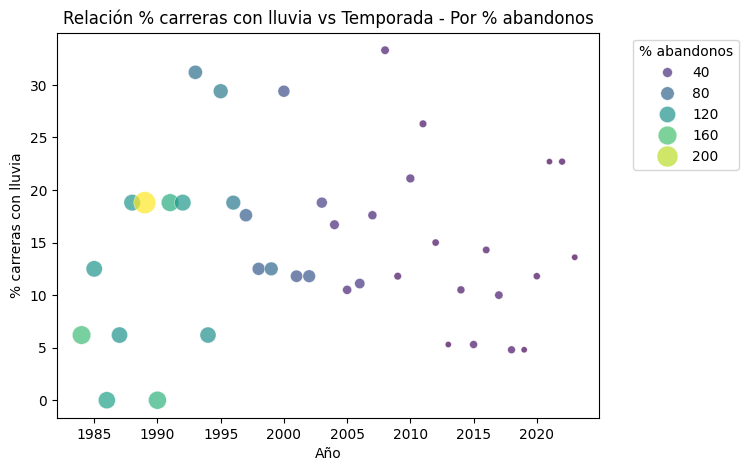

In [37]:
plt.figure(figsize=(7, 5)) 
sns.scatterplot(df_relation_percent_DNF_wet_races,x="year",y="percentage", size ="ratio_DNF", sizes = (20, 250), alpha = 0.7, hue="ratio_DNF", palette="viridis")
plt.xlabel("Año")
plt.ylabel ("% carreras con lluvia")
plt.title("Relación % carreras con lluvia vs Temporada - Por % abandonos")
plt.legend(title="% abandonos",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("./img/3_Weather/Tri_Relacion_lluvia_Temporada.png", bbox_inches='tight')

In [38]:
# Tampoco hay relacion entre las variables.
# No hay relacioncon el eje temporal en cuenta que hayan mas carreras o menos con lluvia, como era de esperar

corr, p_value = pearsonr(df_relation_percent_DNF_wet_races['percentage'], df_relation_percent_DNF_wet_races['year'])
print(f"Coeficiente de correlación: {corr}, Valor p: {p_value}")

Coeficiente de correlación: 0.02692171301580206, Valor p: 0.8690239319300052


## 4.2 WET y Media adelantamientos - Análisis gráfico y estadístico

In [39]:
wet_races_percentage.head(3)

,year,percentage
0,1984,6.2
1,1985,12.5
2,1986,0.0


In [40]:
df_overtakes_average = pd.read_csv("./data/overtaking_season_averages.csv")
df_overtakes_average.head(3)
df_overtakes_average.rename(columns={"Season":"year"}, inplace=True)
df_overtakes_average.head(3)

,year,Overtakes,Overtakes on TV,No. of Races,Average,Average on TV,Median,Median on TV
0,1984,781,113,16,48.8,7.1,50.0,5.5
1,1985,742,102,16,46.4,6.4,48.0,6.0
2,1986,658,107,16,41.1,6.7,35.0,6.0


In [41]:
df_wet_races_overtakes_relation = pd.merge(wet_races_percentage,df_overtakes_average, on="year", how="left")
df_wet_races_overtakes_relation.head(3)

,year,percentage,Overtakes,Overtakes on TV,No. of Races,Average,Average on TV,Median,Median on TV
0,1984,6.2,781,113,16,48.8,7.1,50.0,5.5
1,1985,12.5,742,102,16,46.4,6.4,48.0,6.0
2,1986,0.0,658,107,16,41.1,6.7,35.0,6.0


### 4.2.1 Análisis por temporadas

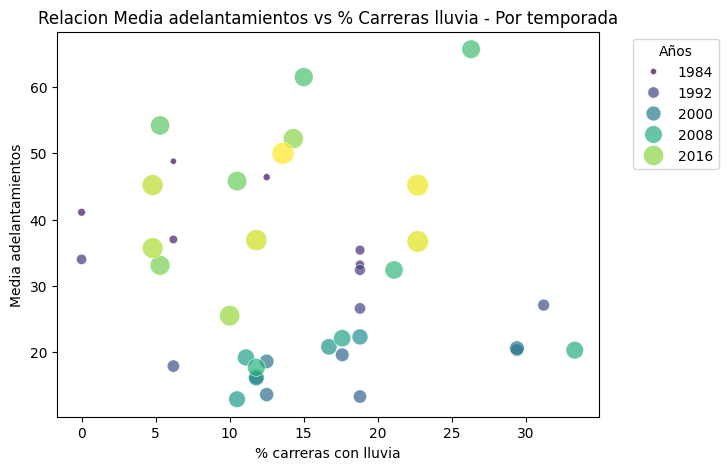

In [42]:
# Se observa como hay mayor numero de puntos de mayor tamaño conforme aumentan los adelantamientos como era de esperar viendo los otros graficos.
# Se observa como estan muy distribuidos por todo el grafico los puntos, por lo que no parece que haya una relacion entre los adelantamientos y la lluvia en los ultimos 40 años de F1.

plt.figure(figsize=(7, 5)) 
sns.scatterplot(df_wet_races_overtakes_relation,x="percentage",y="Average", size ="year", sizes = (20, 250), alpha = 0.7, hue="year", palette="viridis")
plt.ylabel("Media adelantamientos")
plt.xlabel ("% carreras con lluvia")
plt.title("Relacion Media adelantamientos vs % Carreras lluvia - Por temporada")
plt.legend(title="Años", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("./img/3_Weather/Tri_Relacion_MeanOver_Lluvia.png",  bbox_inches='tight')

In [43]:
# No hay relacion entre las variables segun Pearson. 
# La cantidad de carreras con lluvia en una temporada no garantiza mayor numero de adelantamientos.
# Si bien, parece que on el paso de los años, los adelantamientos en mojado han aumentado.
# Podria deverse al aumento de prestaciones de los vehiculos, que hacen que conducir en mojado, cada vez se menos diferente a conducir el seco.
# Los coches modernos secan la pista a mucha mas velocidad, con lo que las condiciones de mojado desaparecen mas rapidamente.

corr, p_value = pearsonr(df_wet_races_overtakes_relation['Average'], df_wet_races_overtakes_relation['percentage'])
print(f"Coeficiente de correlación: {corr}, Valor p: {p_value}")

Coeficiente de correlación: -0.15227801804710064, Valor p: 0.3482252058038695


### 4.2.2 Análisis por % carreras con lluvia

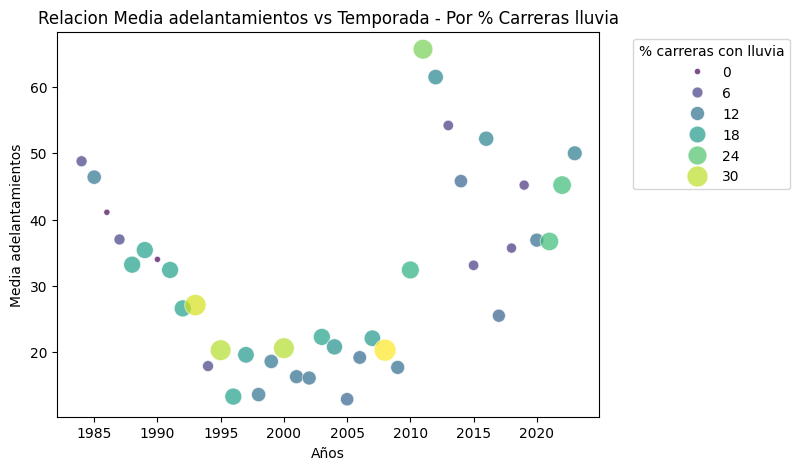

In [44]:
# Como se vio en el analisis de los adelantamientos, hay 3 zonas muy marcadas. 
# Se aprecia cierta relacion en la intermedia del grafico, donde las bolas mas grandes estan por encima de las medianas. Esto podria darnos a entender que a mayor carreras en humedo, mayor
# es la cantidad de adelantamientos, pero no se ve con claridad que en las otras zonas tenga relacion.

plt.figure(figsize=(7, 5)) 
sns.scatterplot(df_wet_races_overtakes_relation,x="year",y="Average", size ="percentage", sizes = (20, 250), alpha = 0.7, hue="percentage", palette="viridis")
plt.ylabel("Media adelantamientos")
plt.xlabel ("Años")
plt.title("Relacion Media adelantamientos vs Temporada - Por % Carreras lluvia")
plt.legend(title="% carreras con lluvia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("./img/3_Weather/Tri_Relacion_MeanOver_Temporada.png",  bbox_inches='tight')

In [45]:
# En esta caso, los datos nos dicen que no hay una relacion entre los años y la media de adelantamientos.
# Esto es porque hay 3 zonas muy diferenciadas, que entre ellas se contraponen dando este falso valor.
# Los adelantamientos en el ultimo tercio de los 40 años estudiados han mejorado sustancialmente.

corr, p_value = pearsonr(df_wet_races_overtakes_relation['Average'], df_wet_races_overtakes_relation['year'])
print(f"Coeficiente de correlación: {corr}, Valor p: {p_value}")

Coeficiente de correlación: 0.26904411947288936, Valor p: 0.09320268134315272


### 4.2.3 IMPORTANTE: Análisis por Media adelantamientos

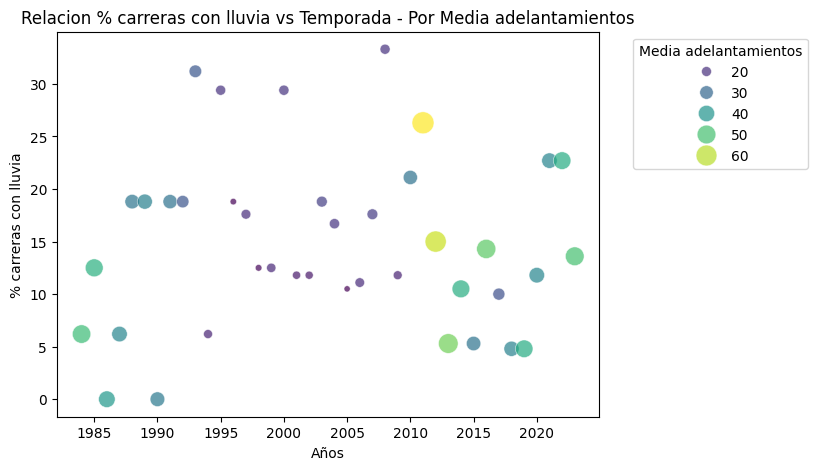

In [46]:
# MUY IMPORTANTE
# Este grafico es muy relevante, pues se ve que justo la zona media del eje temporal, donde parece que la media de carreras con lluvia sea mucho mayor,
# es la zona donde menos adelantamientos hubieron.
# Este hecho reafirma la hipotesis de que la presencia de agua, no es por si sola ganrantia de adelantamientos.

plt.figure(figsize=(7, 5)) 
sns.scatterplot(df_wet_races_overtakes_relation,x="year",y="percentage", size ="Average", sizes = (20, 250), alpha = 0.7, hue="Average", palette="viridis")
plt.ylabel("% carreras con lluvia")
plt.xlabel ("Años")
plt.title("Relacion % carreras con lluvia vs Temporada - Por Media adelantamientos")
plt.legend(title="Media adelantamientos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("./img/3_Weather/Tri_Relacion_Lluvia_Temporada_Over.png",  bbox_inches='tight')

### Pearson ya calculado en en el punto 4.1.3